In [1]:
# %matplotlib inline
# %matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
# from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)
import ast
import json

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os
from ast import literal_eval
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


In [2]:
def import_cleaned_data(filename):
    

    with open(filename,'rb') as file:
        data = pkl.load(file)

    return data




# Load H-AI data


In [4]:
filename = '../data/human/anonymized/human_ai_exp_data_with_advers_annot_experience.csv'
h_ai_data = pd.read_csv(filename)


In [6]:
h_ai_data.columns

Index(['Unnamed: 0', 'workerid_num', 'Unnamed: 0.1', 'MODEL_TYPE',
       'PLAYER_INDEX', 'age', 'bonus_calc', 'bot_test', 'difficulty',
       'early_exit', 'fun', 'gender', 'intuitiveness', 'other_feedback',
       'partner_strategy', 'self_strategy', 'smoothness', 'video_games',
       'vg_experience_bool', 'layout_name', 'reward'],
      dtype='object')

In [9]:
all_layout_names = h_ai_data['layout_name'].unique()
print('all_layout_names', all_layout_names)
all_layout_data = {}

for lname in all_layout_names:
    all_layout_data[lname] = h_ai_data[h_ai_data['layout_name']==lname]


all_layout_names ['asymmetric_advantages' 'coordination_ring' 'cramped_room' 'random0'
 'random3']


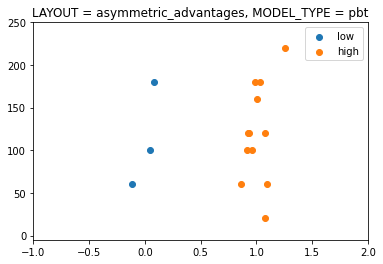

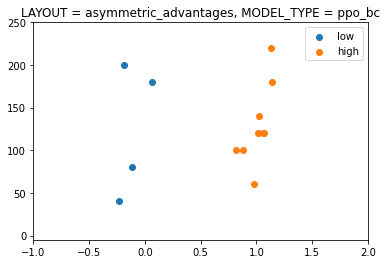

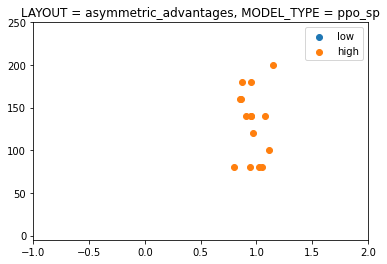

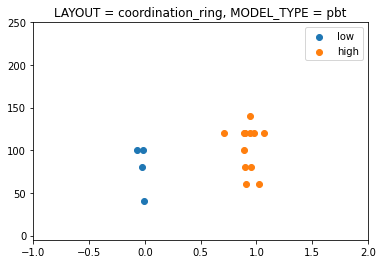

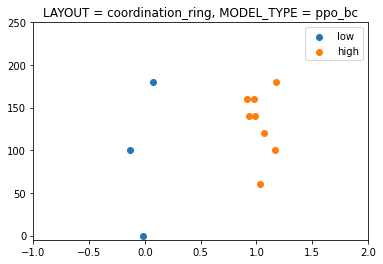

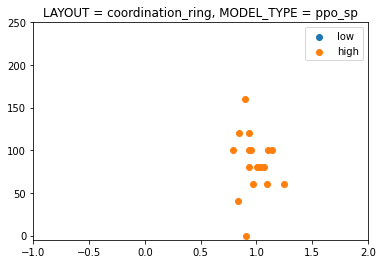

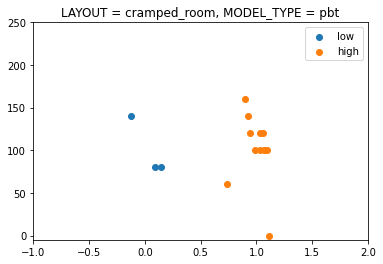

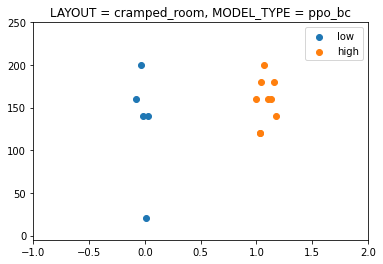

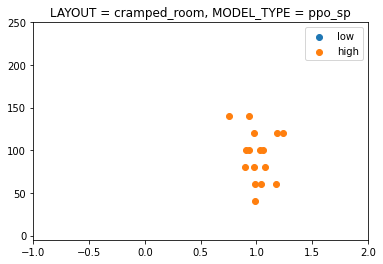

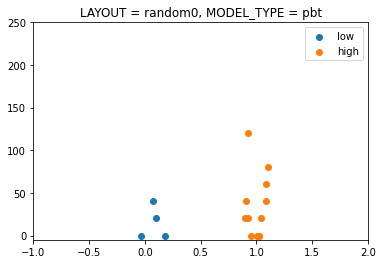

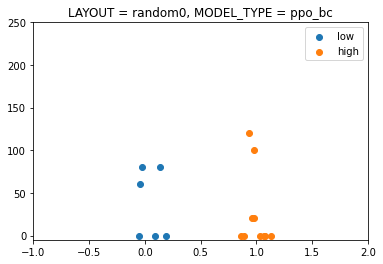

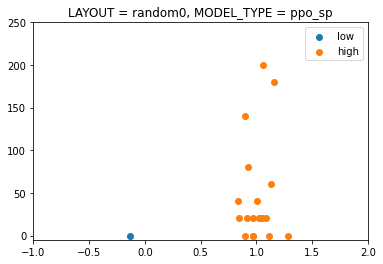

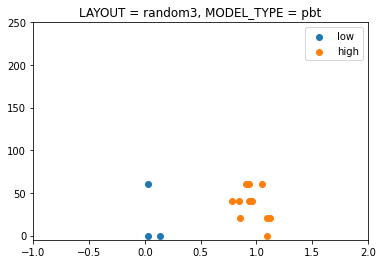

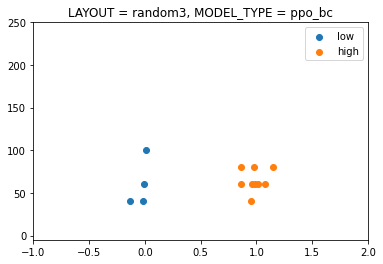

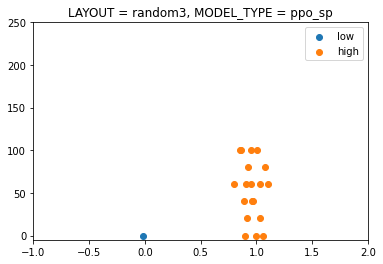

In [30]:
for layout_name in all_layout_names:
    layout_df = all_layout_data[layout_name]
    for model_type in layout_df['MODEL_TYPE'].unique():
        layout_model_df = layout_df[layout_df['MODEL_TYPE'] == model_type]
        low_exp_rewards = layout_model_df[layout_model_df['vg_experience_bool']==0]['reward']
        high_exp_rewards = layout_model_df[layout_model_df['vg_experience_bool']==1]['reward']

    #     plt.hist(low_exp_rewards, alpha=0.8)
    #     plt.hist(high_exp_rewards, alpha=0.3)
    #     plt.legend(['low', 'high'])
        plt.scatter([0]*(len(low_exp_rewards))+np.random.normal(0,0.1,size=len(low_exp_rewards)), low_exp_rewards)
        plt.scatter([1]*(len(high_exp_rewards))+np.random.normal(0,0.1,size=len(high_exp_rewards)), high_exp_rewards)
        plt.legend(['low', 'high'])
        plt.title("LAYOUT = "+layout_name +", MODEL_TYPE = "+model_type)
        plt.xlim(-1,2)
        plt.ylim(-5, 250)
        plt.show()
